In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_excel("C:/Users/User/Desktop/dataset-8.xlsx")
data.head()

,Unnamed: 0,X,Y
0,0,75.1,577.8
1,1,74.3,577.0
2,2,88.7,570.9
3,3,114.6,578.6
4,4,98.5,572.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      int64  
 1   X           5 non-null      float64
 2   Y           5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 248.0 bytes


In [6]:

z = np.abs(stats.zscore(data))
print(z)

[[1.41421356 0.9994708  0.79568745]
 [0.70710678 1.05228299 0.5369273 ]
 [0.         0.10166348 1.43611881]
 [0.70710678 1.60813135 1.05444759]
 [1.41421356 0.54528592 0.95094353]]


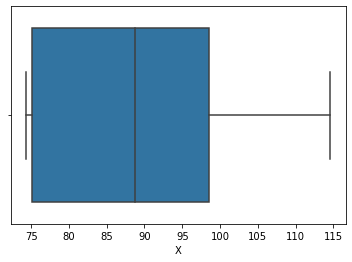

In [7]:
sns.boxplot(x=data['X'])

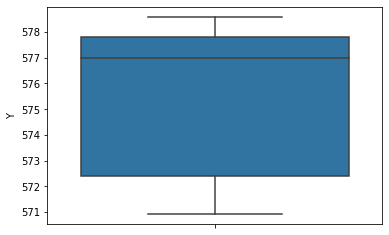

In [8]:
sns.boxplot(y=data['Y'])

In [9]:

f_data = data[(z < 3).all(axis=1)]
f_data.head()

,Unnamed: 0,X,Y
0,0,75.1,577.8
1,1,74.3,577.0
2,2,88.7,570.9
3,3,114.6,578.6
4,4,98.5,572.4


In [10]:

print(len(data))
print(len(f_data))
if(len(data) == len(f_data)):
    print('No outliners')

5
5
No outliners


In [11]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,Unnamed: 0,X,Y
0,0.00,0.019851,0.896104
1,0.25,0.000000,0.792208
2,0.50,0.357320,0.000000
3,0.75,1.000000,1.000000
4,1.00,0.600496,0.194805


In [12]:
train_data,test_data = train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

4


,Unnamed: 0,X,Y
2,0.50,0.357320,0.000000
4,1.00,0.600496,0.194805
3,0.75,1.000000,1.000000
0,0.00,0.019851,0.896104


In [13]:
xa = np.array(train_data['X'])
ya = np.array(train_data['Y'])

In [14]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values 
m1 = -1.0 
c1 = 1.0  #variable x, y
itr = 100  #epoches
learning_rate = 0.1  #learning rate
for i in range(0,itr):
    dfmv1 = 0
    dfcv1 = 0
    er = 0
    for j in range(0,len(xa)):
        er +=  ((ya[j] - (m1 * xa[j]) - c1))**2
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, xa[j]) 
        dfmv = dfmv.subs(y, ya[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, xa[j]) 
        dfcv = dfcv.subs(y, ya[j]) 
        dfcv = round(dfcv,2)
        dfmv1 += dfmv
        dfcv1 += dfcv
    dfmv1 = dfmv1/len(xa)
    dfcv1 = dfcv1/len(xa)
    
    dfmv1 = round(dfmv1,2)
    dfcv1 = round(dfcv1,2)
    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm
    m1 = round(m1, 2) 
    c1 = c1 + dc
    c1 = round(c1, 2)
    er = (1/(2*len(train_data['X'])))*(er)
    err.append(er)
    #step5 increment iterations 
    #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
-0.41 0.77
minimum value obtained at m = -0.41 ,c =0.77 for given function


In [15]:

train_data_pred =  m1*train_data['X'] + c1

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.2311276788276043

Text(0.5, 1.0, 'predicted data vs actual data')

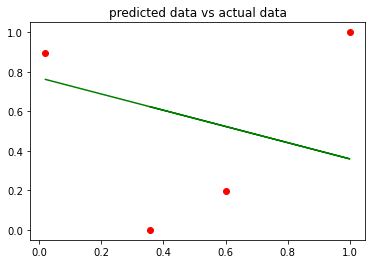

In [16]:

plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title('predicted data vs actual data')

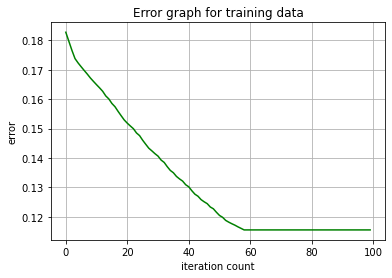

In [17]:
iters = np.arange(itr)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

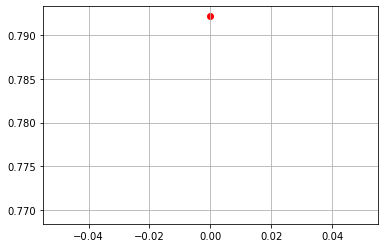

In [19]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()